In [86]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Create a directed graph with N nodes
N = 10  # Number of nodes
G = nx.erdos_renyi_graph(N, 0.3, directed=True)  # Random directed graph with probability 0.3 for edge creation

In [88]:
# Perform Random Walk on the graph
def random_walk(graph, start_node, steps=1000):
    path = [start_node]  # List to store the path
    node_scores = {node: 0 for node in graph.nodes()}  # Initialize scores for all nodes
    
    for _ in range(steps):
        current_node = path[-1]
        neighbors = list(graph.neighbors(current_node))  # Get neighbors of the current node
        if neighbors:  # If there are neighbors
            next_node = random.choice(neighbors)  # Randomly choose the next node
            path.append(next_node)
            node_scores[next_node] += 1  # Increase score for the visited node
        else:
            break  # End walk if there are no neighbors
    
    return node_scores


In [89]:
# Calculate PageRank using inbuilt method
def page_rank(graph):
    return nx.pagerank(graph)

In [90]:
# Run the Random Walk
start_node = random.choice(list(G.nodes()))  # Randomly choose a start node
node_scores_random_walk = random_walk(G, start_node, steps=1000)

In [91]:
# Run the inbuilt PageRank
node_scores_pagerank = page_rank(G)

In [92]:
# Sort the nodes based on the scores from Random Walk
sorted_random_walk = sorted(node_scores_random_walk.items(), key=lambda x: x[1], reverse=True)

In [93]:
# Sort the nodes based on the scores from PageRank
sorted_pagerank = sorted(node_scores_pagerank.items(), key=lambda x: x[1], reverse=True)

In [94]:
# Display the results
print("Sorted nodes based on Random Walk scores:")
for node, score in sorted_random_walk:
    print(f"Node {node}: {score} visits")

Sorted nodes based on Random Walk scores:
Node 3: 127 visits
Node 9: 124 visits
Node 5: 121 visits
Node 6: 120 visits
Node 1: 119 visits
Node 4: 118 visits
Node 0: 105 visits
Node 7: 78 visits
Node 8: 70 visits
Node 2: 18 visits


In [95]:
print("\nSorted nodes based on PageRank scores:")
for node, score in sorted_pagerank:
    print(f"Node {node}: {score}")


Sorted nodes based on PageRank scores:
Node 3: 0.13379739976802493
Node 9: 0.11665383870483884
Node 1: 0.11634964257849524
Node 4: 0.11000503083886115
Node 6: 0.10982847153495064
Node 5: 0.10966978745243083
Node 0: 0.10795152496222311
Node 7: 0.08459630225639395
Node 8: 0.0821777740382656
Node 2: 0.028970227865515598


In [96]:
# Visualization of the graph with node sizes based on their PageRank values
page_rank_values = list(node_scores_pagerank.values())
node_sizes = [value * 10000 for value in page_rank_values]  # Size nodes based on PageRank score

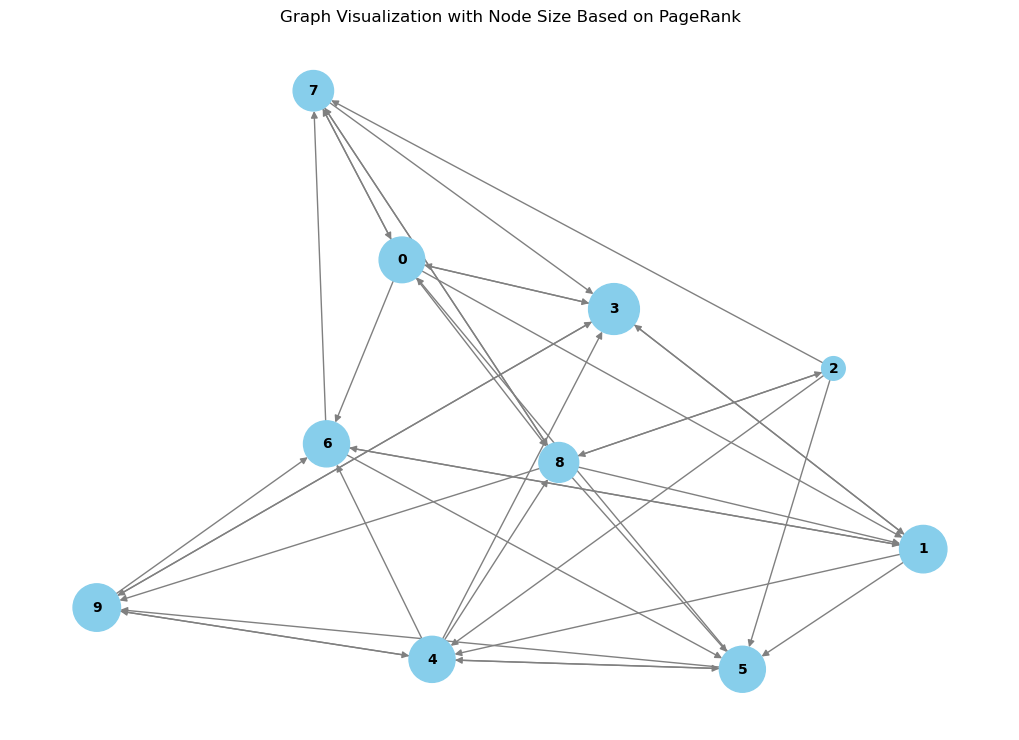

In [97]:
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Visualization with Node Size Based on PageRank")
plt.show()

Explanation of the Code:
----
1. Graph Creation (G = nx.erdos_renyi_graph(N, 0.3, directed=True)):
- We use an Erdős–Rényi model to create a random directed graph with N nodes. The probability of an edge between two nodes is set to 0.3.

2. Random Walk (random_walk() function):
- The random_walk function simulates a random walk on the graph. Starting from a randomly chosen node, it randomly chooses neighboring nodes and moves to them.
- For each node visited, a score is maintained, which is the number of times the node is visited during the walk.
- The random walk continues for a specified number of steps (steps=1000).

3. PageRank Calculation (page_rank() function):
- The nx.pagerank() function computes the PageRank values for the nodes in the graph. PageRank is based on the idea that the importance of a node is related to the number and quality of incoming links.

4. Sorting and Displaying Results:
- The nodes are sorted in descending order of their visit count (for Random Walk) and their PageRank values.
- The sorted lists are then printed for comparison.

5. Visualization:
- A graph is visualized using Matplotlib, with node sizes proportional to their PageRank values to give an intuitive representation of node importance.

Questions:
---

1. What is meant by Random Walk?
- A Random Walk is a process where you start at a node and randomly move to a neighboring node, repeating this for a number of steps. It's used to simulate random movement through a network or graph.

2. How have you implemented the Random Walk method?
- The Random Walk is implemented by:
- Creating a directed graph with random connections.
- Starting from a random node and repeatedly choosing a random neighbor.
- Keeping track of how many times each node is visited, which gives a score based on the frequency of visits.

3. What is the PageRank Algorithm?
- PageRank ranks nodes (e.g., web pages) based on the number and quality of incoming links. It iteratively updates node scores by considering the scores of the nodes linking to them. Nodes with higher scores are considered more important.
$$
PR(A) = \frac{1 - d}{N} + d \sum_{i \in M(A)} \frac{PR(i)}{L(i)}
$$

- \( PR(A) \) is the **PageRank** of node \( A \).
- \( M(A) \) is the set of nodes that link to node \( A \).
- \( L(i) \) is the number of outbound links from node \( i \).
- \( d \) is the **damping factor** (typically set to 0.85) to simulate the probability that a random surfer continues clicking on links.
- \( N \) is the total number of nodes in the graph.
